<a href="https://colab.research.google.com/github/antussa2016/Acodes2021/blob/main/Using_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imbalanced-learn

In [4]:
import pandas as pd
from sklearn.datasets import make_classification
import seaborn as sms
import matplotlib.pyplot as plt
import numpy as np

In [9]:
X,y = make_classification(n_samples= 5000,n_features=2, n_informative=2,
                          n_redundant= 0, n_repeated= 0, n_classes= 3,
                          n_clusters_per_class=1, weights=[0.05, 0.1, 0.85],
                          class_sep= 0.8, random_state= 0)

In [31]:
X[:,0]

array([ 0.66242021, -0.2013808 ,  1.20804486, ...,  0.89447133,
        1.40312887,  1.79589648])

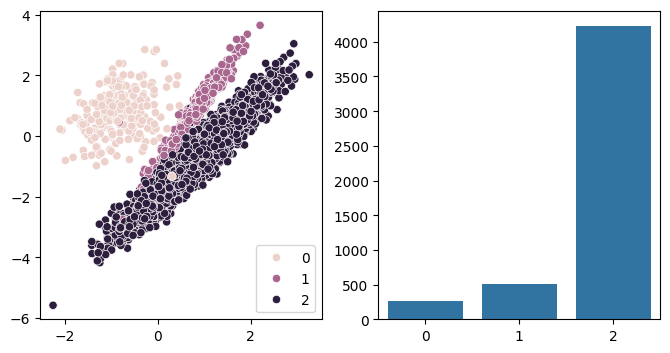

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(8,4))
sms.scatterplot(x=X[:,0],y=X[:,1], hue = y, ax=ax[0])
idx, c = np.unique(y, return_counts=True)
sms.barplot(x=idx, y=c, ax=ax[1])
plt.show()

In [19]:
from imblearn.over_sampling import SMOTE
x_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X,y)

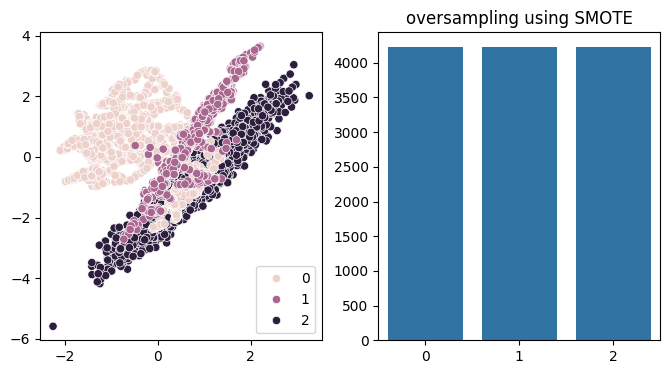

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(8,4))
sms.scatterplot(x=x_resampled[:,0],y=x_resampled[:,1], hue = y_resampled, ax=ax[0])
idx, c = np.unique(y_resampled, return_counts=True)
sms.barplot(x=idx, y=c, ax=ax[1])
plt.title("oversampling using SMOTE")
plt.show()

In [22]:
print("original sample: ", np.unique(y, return_counts = True))
print("After Overt_sampling using SMOTE: ", np.unique(y_resampled, return_counts=True))

original sample:  (array([0, 1, 2]), array([ 262,  510, 4228]))
After Overt_sampling using SMOTE:  (array([0, 1, 2]), array([4228, 4228, 4228]))


# **Adding Parameters**



In [23]:
d = {0: 1000, 1:1000, 2:5000}
x_res_2, y_res_2 = SMOTE(sampling_strategy=d, random_state=42).fit_resample(X,y)

/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (5000) in class 2 will be larger than the number of samples in the majority class (class #2 -> 4228)
  warnings.warn(


In [24]:
print("original sample: ", np.unique(y, return_counts = True))
print("After Overt_sampling using SMOTE: ", np.unique(y_res_2, return_counts=True))

original sample:  (array([0, 1, 2]), array([ 262,  510, 4228]))
After Overt_sampling using SMOTE:  (array([0, 1, 2]), array([1000, 1000, 5000]))


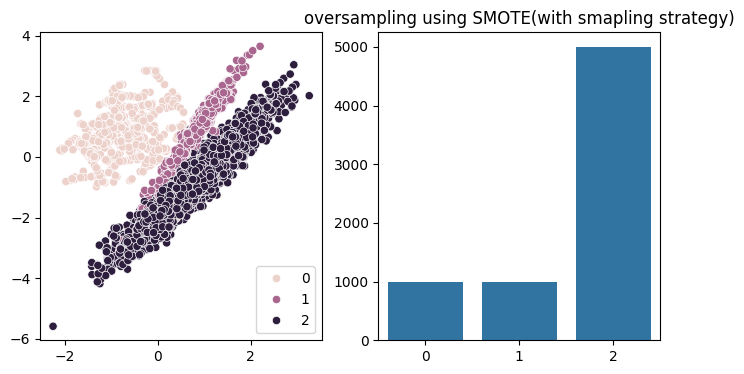

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(8,4))
sms.scatterplot(x=x_res_2[:,0],y=x_res_2[:,1], hue = y_res_2, ax=ax[0])
idx, c = np.unique(y_res_2, return_counts=True)
sms.barplot(x=idx, y=c, ax=ax[1])
plt.title("oversampling using SMOTE(with smapling strategy)")
plt.show()